In [3]:
import pandas as pd

df=pd.read_csv("D:\Data Analyst\Python\Session 8(DataFrame Operations)\cars.csv")
df

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,NaN,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,NaN,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,NaN,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [3]:
# Cheking null values

df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               37
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [4]:
# Treating missing values

for i in df:
    if df[i].dtypes=='object':
        m=df[i].mode()[0]
        df[i]=df[i].fillna(m)
    else:
        avg=df[i].mean()
        df[i]=df[i].fillna(avg)

In [5]:
# Cheking null values again

df.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [6]:
#Seggregating data in categorical and continuous type

cat=[]
con=[]

for i in df:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

# 1)Univariate analysis
# A)Categorical Features (Containing Text)

In [5]:
df.value_counts('Type')

Type
Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: count, dtype: int64

<Axes: xlabel='Type'>

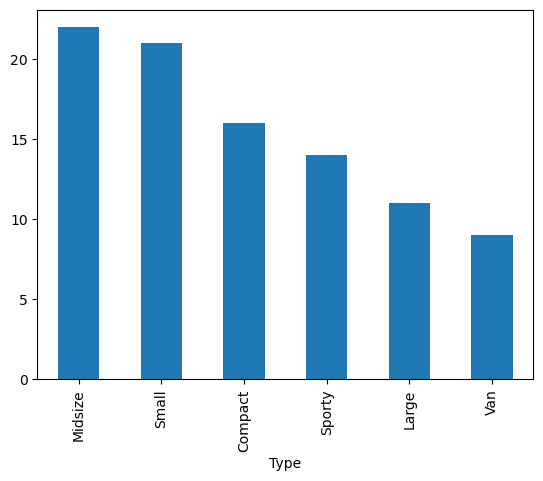

In [8]:
# Univariate Bar Chart for 'Type'

df['Type'].value_counts().plot(kind="bar")

# B)Continuous Features(Numerical Features)


<Axes: ylabel='Frequency'>

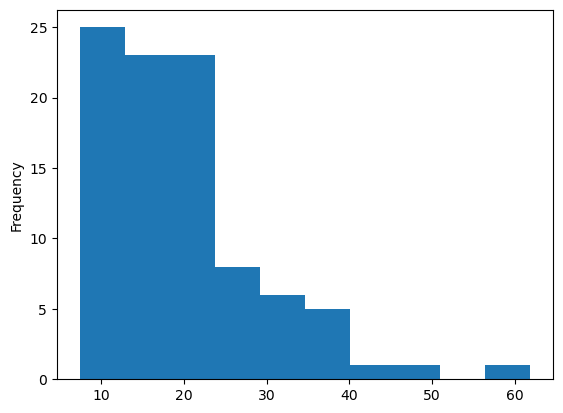

In [9]:
# visualize data kind='hist' for Price column

df['Price'].plot(kind='hist')

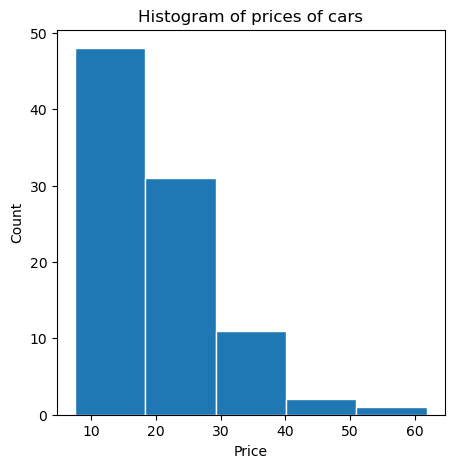

In [4]:
#2. Histogram (Univariate - Numeric Variable):
#Let's consider 'Price' as a numeric variable.

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.hist(df['Price'],edgecolor='white',bins=5)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of prices of cars')
plt.show()

# Univariate Analysis of Categorical Data
# A)Bar Charts

<Axes: xlabel='Type'>

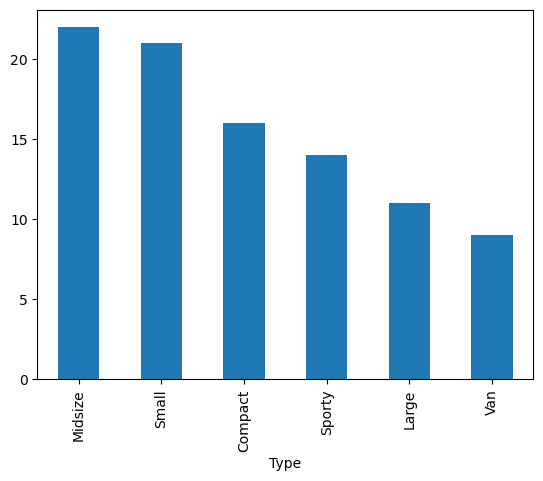

In [11]:
df['Type'].value_counts().plot(kind='bar')

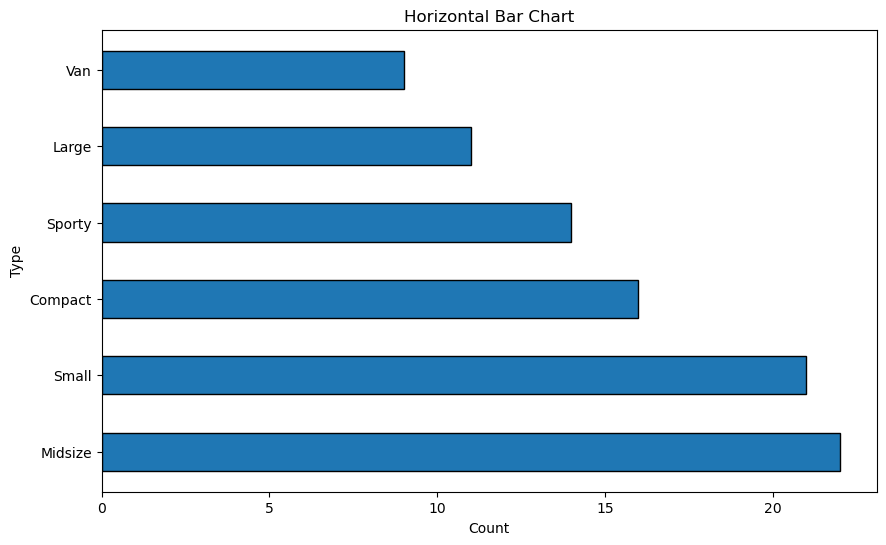

In [6]:
# Horizontal bar chart
# Prctise

import matplotlib.pyplot as plt

c=df['Type'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(c.index, c, edgecolor="black", height=0.5)  
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Horizontal Bar Chart')
plt.show()


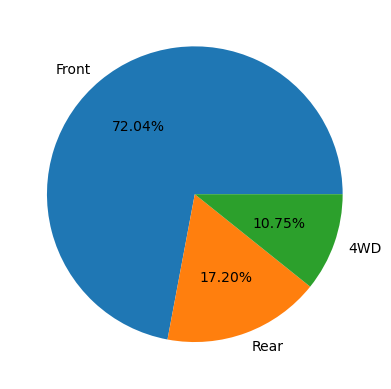

In [13]:
# Pie Chart 
# Practise
# Univariate Pie Chart for 'DriveTrain'

c=df['DriveTrain'].value_counts()

plt.pie(c,labels=c.index,autopct='%0.02f%%')
plt.show()

# Countplot (Seaborn)

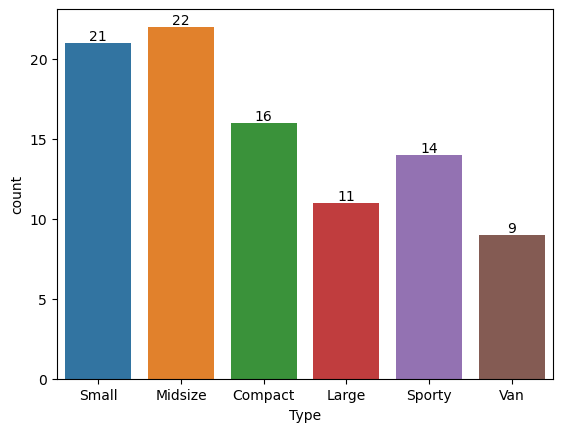

In [4]:
import seaborn as sns

ax =sns.countplot(x="Type", data= df)

for bars in ax.containers:
    ax.bar_label(bars)

# Bivariate Analysis 

# 1)Both Variables are continuous

# A)Scatterplot

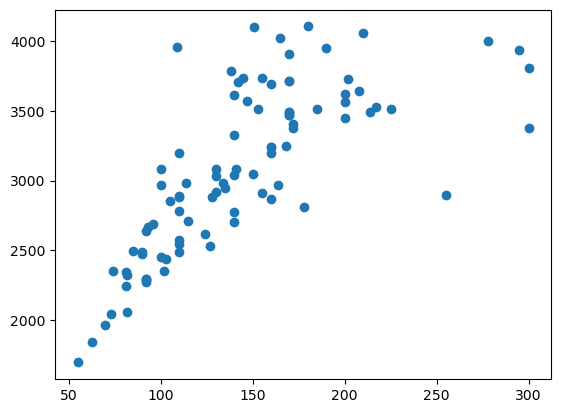

In [15]:
#Create scatter plots for Horsepower vs. Weight to identify potential relationships

plt.scatter(df["Horsepower"],df["Weight"])

# B)Correlation

In [16]:
## Contiuous vs Continuous (Price,Horsepower)

df[['Price','Horsepower']].corr()

,Price,Horsepower
Price,1.000000,0.788218
Horsepower,0.788218,1.000000


# C)Heatmap

<Axes: >

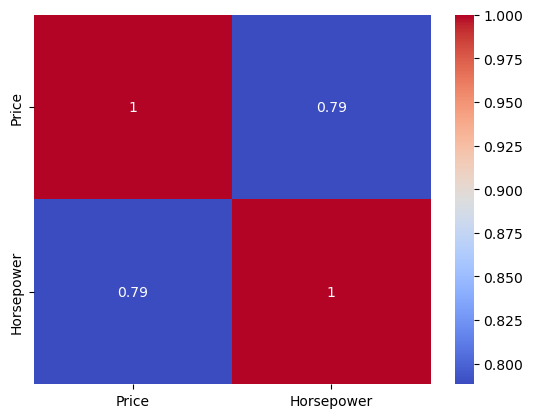

In [18]:
# Create a heatmap

c= df[['Price','Horsepower']].corr()
sns.heatmap(c, annot=True,cmap='coolwarm')

# 2)Continuous vs Categorical

# A)Boxplots

In [19]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [20]:
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

<Axes: xlabel='Type', ylabel='Price'>

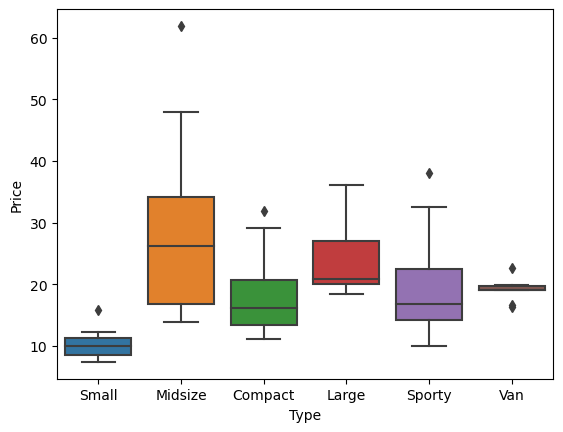

In [21]:
sns.boxplot(x="Type",y="Price",data =df)

# 3)Categorical vs Categorical



# A)Crosstab

In [23]:
ct=pd.crosstab(df['Type'],df['Origin']) 
ct

Origin,USA,non-USA
Type,,
Compact,7,9
Large,11,0
Midsize,10,12
Small,7,14
Sporty,8,6
Van,5,4


# b)Heatmap

<Axes: xlabel='Origin', ylabel='Type'>

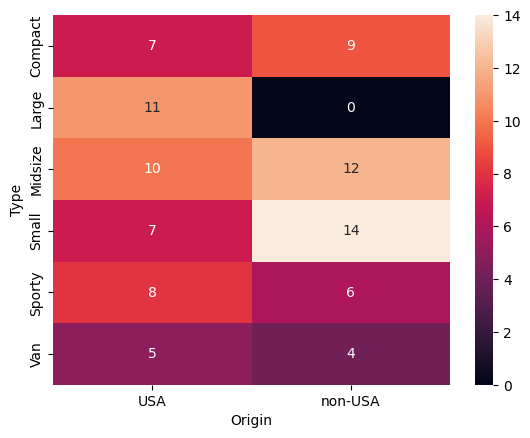

In [24]:
sns.heatmap(ct,annot=True)

# Multivariate Analysis

# Multivariate analysis involves examining the relationships between multiple variables simultaneously.
# It helps in understanding complex interactions and dependencies.

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


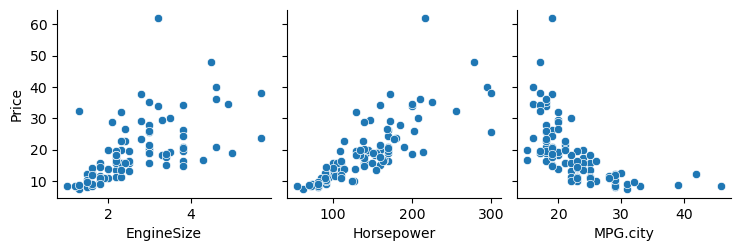

In [25]:
#Conduct a multivariate analysis with Price as the dependent variable and predictors like EngineSize, Horsepower, and MPG.city.

sns.pairplot(df,x_vars=['EngineSize','Horsepower','MPG.city'],y_vars=['Price'])
plt.show()